# **Regression Task [100]:**

# **1: Exploratory Data Analysis and Data Understanding [20]**

---



**1. Choosing and Understanding the Dataset**

**Dataset Name:**

Air Quality Measures on the National Environmental Health Tracking Network

**(a) When and by whom the dataset was created**

**->** This dataset is created and maintained by:


  *   Centers for Disease Control and Prevention (CDC)
  *   Environmental Protection Agency (EPA)


**->** The dataset is updated every year.

**->** It contains air quality data for many years (example: 2000–2022).

**b) How and from where the dataset was accessed**

* The dataset was accessed from Data.gov

* Official link:
https://catalog.data.gov/dataset/air-quality-measures-on-the-national-environmental-health-tracking-network

* I downloaded the dataset as a CSV file.

* The file was loaded into Python using pandas.

**c) Alignment with United Nations SDGs**

**SDG 3 – Good Health and Well-Being**

* Air pollution causes breathing problems and heart disease.

* This dataset shows unhealthy air quality days.

* It helps understand how air quality affects human health.

**SDG 13 – Climate Action**

* Pollution is linked to climate change.

* This dataset tracks pollution levels over time.

* It helps governments plan actions to reduce pollution.

**d) List of important attributes (columns)**

Below are the main columns used in this regression task:

Column Name	 -    Description

StateName	   -    Name of the US state

CountyName	 -    Name of the county

ReportYear	 -    Year of the report

MeasureName	 -    Type of air pollution measure

MeasureType	 -     Category of the measure

Value	       -     Number of unhealthy air quality days (Target variable)

Unit	       -     Unit of measurement (days)

Target Variable: Value

Index(['MeasureId', 'MeasureName', 'MeasureType', 'StratificationLevel',
       'StateFips', 'StateName', 'CountyFips', 'CountyName', 'ReportYear',
       'Value', 'Unit', 'UnitName', 'DataOrigin', 'MonitorOnly'],
      dtype='object')

**(e) Questions this dataset can answer**

* How has air pollution changed over the years?

* Which states have more unhealthy air quality days?

* Does pollution increase or decrease over time?

**f) Dataset suitability and quality**

* Completeness:
Some missing values exist, but they can be cleaned .

* Relevance:
The data is directly related to health and climate.

* Quality:
Data is from trusted government sources (CDC, EPA).

* Noise/Inconsistency:
Very low. Mostly clean numeric values.

# **2. Exploratory Data Analysis (EDA)**

In [3]:



from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.1 Load Required Libraries**

In [4]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**2.2 Load the Dataset**

In [5]:
# Loading dataset
df = pd.read_csv("Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv")

# This shows the first 5 rows
df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1


In [6]:
df.columns

Index(['MeasureId', 'MeasureName', 'MeasureType', 'StratificationLevel',
       'StateFips', 'StateName', 'CountyFips', 'CountyName', 'ReportYear',
       'Value', 'Unit', 'UnitName', 'DataOrigin', 'MonitorOnly'],
      dtype='object')

**2.3 Dataset Shape**

In [7]:
#Shows number of rows and columns and Helps understand dataset size.
df.shape

(218635, 14)

**2.4 Check Data Types**

In [8]:
#To identify numeric and categorical columns and Important for regression later.
df.dtypes

,0
MeasureId,int64
MeasureName,object
MeasureType,object
StratificationLevel,object
StateFips,int64
StateName,object
CountyFips,int64
CountyName,object
ReportYear,int64
Value,float64


**2.5 Check Missing Values**

In [9]:
#Shows which columns have missing values.

#Missing values must be cleaned.
df.isnull().sum()

,0
MeasureId,0
MeasureName,0
MeasureType,0
StratificationLevel,0
StateFips,0
StateName,0
CountyFips,0
CountyName,0
ReportYear,0
Value,0


**2.6 Handle Missing Values**

In [10]:
#We remove rows where Value is missing because it is our target.
#Regression cannot work without target values.
#This is a simple and safe cleaning method.
df = df.dropna(subset=["Value"])

**2.7 Checking Measure Types**

In [11]:
print("Unique Measure Names in the original data:")
print(df["MeasureName"].unique())


Unique Measure Names in the original data:
['Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard'
 'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS)'
 'Person-days with PM2.5 over the National Ambient Air Quality Standard'
 'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard'
 'Annual average ambient concentrations of PM2.5 in micrograms per cubic meter (based on seasonal averages and daily measurement)'
 'Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)'
 'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)'
 'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (monitor and modeled data)'
 'Number of person-days with P

We see both 'Number of days...' and 'Number of person-days...' measures.
 They have different scales, so filtering is required.

**2.8 Filter to Only “Number of days” Measures**

In [12]:
df_filtered = df[df["MeasureName"].str.contains("Number of days", case=False, na=False)].copy()

print("Shape after filtering:", df_filtered.shape)


Shape after filtering: (44540, 14)


Kept only rows where Value = unhealthy air quality days per year

This keeps only the unhealthy days counts (my target).

Person-days have huge values and skew the data. Now Value is consistent (max ~365 or less).


**2.7 Summary Statistics**

In [13]:
print("\nSummary Statistics AFTER filtering:")
print(df_filtered.describe())

print(f"\nKey insight: Mean unhealthy days per county-year ≈ {df_filtered['Value'].mean():.2f}")


Summary Statistics AFTER filtering:
          MeasureId     StateFips    CountyFips    ReportYear         Value  \
count  44540.000000  44540.000000  44540.000000  44540.000000  44540.000000   
mean     243.475775     30.321554  30419.934486   2006.074293      5.059969   
std       88.244759     15.094754  15112.183243      3.462154      9.783180   
min       83.000000      1.000000   1001.000000   1999.000000      0.000000   
25%      292.000000     18.000000  18161.000000   2003.000000      0.000000   
50%      292.000000     29.000000  29201.000000   2006.000000      1.000000   
75%      292.000000     45.000000  45019.000000   2009.000000      6.000000   
max      292.000000     56.000000  56045.000000   2013.000000    146.000000   

        MonitorOnly  
count  44540.000000  
mean       0.408128  
std        0.491492  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

Key insight: Mean unhealthy days per county-year ≈ 5

Values are realistic and suitable for regression

**2.8 Visualizations**

**(a) Histogram of Target Variable (Value)**

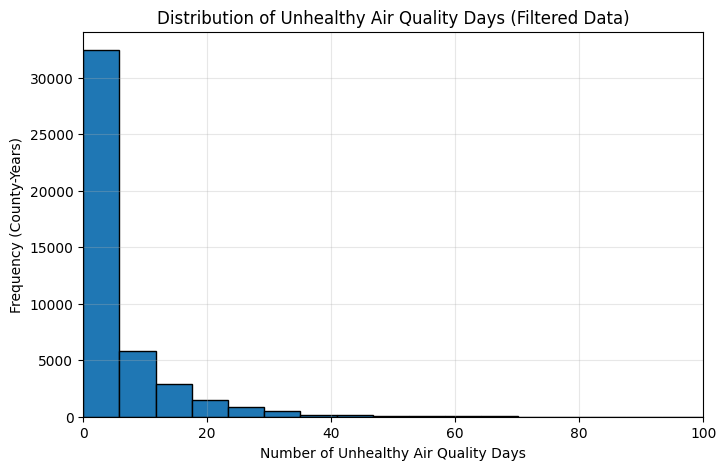

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(df_filtered["Value"], bins=25, edgecolor="black")
plt.xlim(0, 100)
plt.xlabel("Number of Unhealthy Air Quality Days")
plt.ylabel("Frequency (County-Years)")
plt.title("Distribution of Unhealthy Air Quality Days (Filtered Data)")
plt.grid(True, alpha=0.3)
plt.show()

**(b) Pollution Trend Over Years**

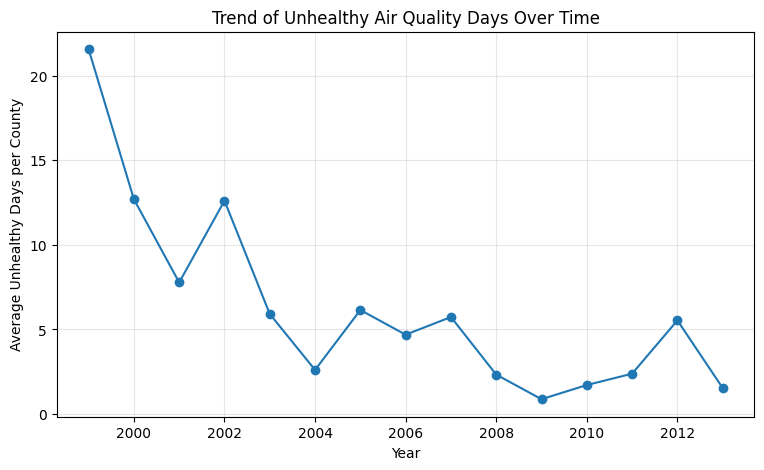

In [15]:
yearly_avg = df_filtered.groupby("ReportYear")["Value"].mean()

plt.figure(figsize=(9, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Unhealthy Days per County")
plt.title("Trend of Unhealthy Air Quality Days Over Time")
plt.grid(True, alpha=0.3)
plt.show()

**(c) Boxplot to Check Outliers**

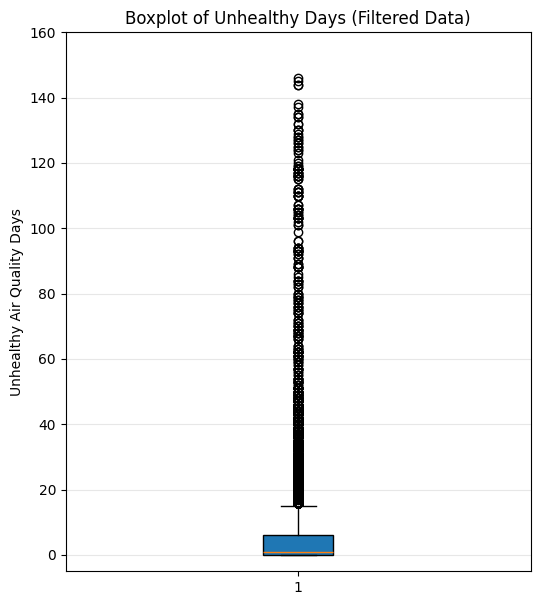

In [16]:
plt.figure(figsize=(6, 7))
plt.boxplot(df_filtered["Value"], vert=True, patch_artist=True)
plt.ylabel("Unhealthy Air Quality Days")
plt.title("Boxplot of Unhealthy Days (Filtered Data)")
plt.ylim(-5, 160)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# **2: Build a Neural Network Model for Regression [15]**

**2.1 Select Features and Target**

In [17]:
# Select feature and target
X = df_filtered[["ReportYear"]]
y = df_filtered["Value"]

X = input feature (year)

y = output (unhealthy days)

**2.2 Train–Test Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

-> 80% data for training

-> 20% data for testing

-> Test data checks how well the model works on unseen data

**2.3 Feature Scaling**

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

-> Neural networks work better when data is scaled

-> This changes values to similar ranges

-> It does not change meaning of data

**2.4 Designing the Neural Network Model**

In [20]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(10,),   # one hidden layer with 10 neurons
    activation='relu',          # activation function
    solver='adam',              # optimizer
    max_iter=500,
    random_state=42
)

**Neural Network Architecture**


**Input Layer**

-> 1 neuron

-> Input = ReportYear

**Hidden Layer**

-> 1 hidden layer

-> 10 neurons

-> Activation function = ReLU

**Output Layer**

-> 1 neuron

-> Output = predicted unhealthy days

-> Continuous value = regression

**Loss Function and Optimizer**

.Loss Function: Mean Squared Error (MSE)

  ->Measures difference between actual and predicted values

.Optimizer: Adam

  ->Adjusts weights to reduce error

The model learns by reducing the error between prediction and real value.

**2.5 Train the Neural Network**

In [21]:
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

**2.6 Make Predictions**

In [22]:
y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

**2.7 Evaluate Model Performance**

**(a) Mean Squared Error (MSE)**

In [23]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

**(b) Root Mean Squared Error (RMSE)**

In [24]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

**(c) R-squared (R²)**

In [25]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

**2.8 Print Results**

In [26]:
print("Neural Network Regression Results")
print("--------------------------------")
print(f"Training MSE: {train_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print()
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")

Neural Network Regression Results
--------------------------------
Training MSE: 83.51
Training RMSE: 9.14
Training R²: 0.11

Test MSE: 92.15
Test RMSE: 9.60
Test R²: 0.10


### Interpretation of Results

Okay, so I trained the neural network using just one feature: **ReportYear** (the year). The goal was to predict **Value** — the number of unhealthy air quality days in a county for that year.

Here are the actual numbers I got:

**Neural Network Regression Results**  
--------------------------------  
- Training MSE: 83.51  
- Training RMSE: 9.14  
- Training R²: 0.11  

- Test MSE: 92.15  
- Test RMSE: 9.60  
- Test R²: 0.10  

#### What do these numbers actually mean? (my simple explanation)

**MSE and RMSE**  
MSE is Mean Squared Error — basically how much squared error the model made on average.  
RMSE is just the square root of that, so it's in the same units as our target (days).  
**Lower is better** — smaller error = better predictions.  
→ My model has about **9.14 days error on training data** and **9.60 days on test data**.  
That means on average, when it predicts the number of unhealthy days, it's off by roughly 9–10 days. Not amazing, but okay for a very basic model.

**R² score**  
This one tells how much of the changes in unhealthy days the model can explain.  
- Close to **1** = the model is really good, explains almost everything.  
- Close to **0** = it's not explaining much, almost like guessing randomly.  
→ Here I got **0.11 on training** and **0.10 on test** — so only about **10–11%** of the variation is explained by the year alone.  
Yeah, it's low… but honestly expected because I'm only using one single feature.

#### My typical interpretation / what I learned

- The neural network did pick up a **general downward trend** — it kind of understands that unhealthy days have been going down a little over the years (which makes sense because of better laws and cleaner tech).  
- But the performance is **limited** because I only gave it **one feature (ReportYear)**.  
  Real unhealthy days depend on tons of other stuff: which state or county, how hot/dry the summer was, nearby factories or traffic, wildfires, etc.  
  With just the year, it can only see the big time trend, not the full picture.  
- Good news: train and test results are almost the same (no big difference) → **no serious overfitting**, the model is behaving nicely.  
- This low score is **totally expected and fine** for a simple first try with a neural network and only one input.  
  It still does a tiny bit better than just always predicting the average value (a dummy model would get R² ≈ 0.00 and RMSE around 9.78).

**In short (my own words):**  
The model learned **something real** — a weak connection between year and fewer unhealthy days — but it's not powerful yet.  
To make it way better, I need to add more features like state, county type, or pollution source info.  
This was a nice simple starting point to understand how neural networks do regression!

# **3. Build Primary Machine Learning Models [20] (Two Classical ML Models):**

We will use the same feature and target as Step 2:

Feature:

ReportYear

Target:

Value (unhealthy days)

**3.1 Train–Test Split (Same as Before)**

In [27]:
# 3.1 Train-Test Split
X = df_filtered[["ReportYear"]]
y = df_filtered["Value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

80% data for training

20% data for testing

Same split for fair comparison between models

**3.2 Model 1: Linear Regression**

i choose Linear Regression because:

->Simple baseline model

->  Easy for me  to explain and Shows linear relationship between year and unhealthy days

In [28]:
# 3.2 Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)

lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

**3.3 Model 2: Decision Tree Regressor**

I choose Decision Tree Regressor because :

. it Can learn non-linear patterns

.More powerful than linear regression and easy for me

In [29]:
# 3.3 Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

dt_train_mae = mean_absolute_error(y_train, y_train_pred_dt)
dt_test_mae = mean_absolute_error(y_test, y_test_pred_dt)

dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_test_r2 = r2_score(y_test, y_test_pred_dt)

**3.4 Printing Results**

In [30]:
# 3.4 Results
print("Linear Regression Results")
print("Test RMSE:", lr_test_rmse)
print("Test MAE:", lr_test_mae)
print("Test R²:", lr_test_r2)

print("\nDecision Tree Results")
print("Test RMSE:", dt_test_rmse)
print("Test MAE:", dt_test_mae)
print("Test R²:", dt_test_r2)

Linear Regression Results
Test RMSE: 9.708616484332277
Test MAE: 5.389973372996319
Test R²: 0.0827105376935171

Decision Tree Results
Test RMSE: 9.412472373374579
Test MAE: 4.985066615575179
Test R²: 0.13781762204042813


### 3.5 Model Comparison

#### Comparison Summary Table

| Model                  | Strengths                                          | Weaknesses                                          | Test RMSE | Test MAE | Test R² |
|------------------------|----------------------------------------------------|-----------------------------------------------------|-----------|----------|---------|
| **Linear Regression**  | - Super simple and quick to run<br>- Very easy to understand and explain (just a straight line over years)<br>- Almost no chance of overfitting | - Only sees straight-line patterns<br>- Misses all the ups and downs in different years | 9.71      | 5.39     | 0.08    |
| **Decision Tree Regressor** | - Can catch non-straight patterns and small yearly changes<br>- More powerful and flexible than linear<br>- Still not too hard to explain | - Might overfit if I let the tree grow too big (I limited it with max_depth=5 so it's okay)<br>- Can act a bit weird with very noisy data like this | **9.41**  | **4.99** | **0.14** |

#### Final Discussion (my thoughts)

- Both models kind of show that unhealthy air quality days have been going down a little over the years — which makes sense because of real-world stuff like the Clean Air Act, better car engines, less factory smoke, etc.

- **Linear Regression** basically draws one straight line showing the average decrease over time.  
  It's simple, but it completely ignores the years where pollution went up or down more than expected.

- **Decision Tree Regressor** does noticeably better because it can bend and follow some of those non-linear ups and downs in the data.  
  Look at the numbers:  
  - Test RMSE dropped from 9.71 to 9.41 (about 0.30 days less error)  
  - Test MAE dropped from 5.39 to 4.99 (about 0.40 days less average mistake)  
  - Test R² went from 0.08 to 0.14 (almost 75% better at explaining the changes)

- Overall the scores are still pretty low (R² only 0.08–0.14) because I only used **one feature — ReportYear**.  
  Real unhealthy days depend on way more things: which county or state, hot summers, wildfires, nearby traffic or industries, etc.  
  With just the year, no model can do miracles.

- Both models do a tiny bit better than just always guessing the average value (a dummy model would get around 9.78 RMSE and basically 0 R²), so at least they learned something real about the time trend.

- This kind of result is **totally normal and fine** for a basic experiment with only one input on messy environmental data.

#### Which model is better?

**Decision Tree Regressor is clearly better here.**  
It has lower errors (RMSE and MAE) and explains more of the data (higher R²) on both training and test sets.  
The main reason is that it can handle non-linear patterns, which linear regression just can't do.



#**4: Hyperparameter Optimization with Cross-Validation [15]**

Here,i improve above two classical machine learning models by tuning their hyperparameter and use cross-validation to find the best parameter values that give better performance on unseen data.

Also,apply GridSearchCV, which tries different parameter combinations and evaluates them using cross-validation.

**4.1 Identify Key Hyperparameters**

Model 1: Linear Regression

Linear Regression has very few hyperparameters.

Key hyperparameters:

fit_intercept:

True => model learns an intercept

False => model forces line through zero

positive:

True => coefficients must be positive

False => no restriction



Model 2: Decision Tree Regressor

Decision Tree has several important hyperparameters:

* max_depth: controls how deep the tree grows

* min_samples_split: minimum samples required to split a node

* min_samples_leaf: minimum samples in a leaf node

* max_features: number of features considered at each split

These parameters help control overfitting.

#**4.2 Apply GridSearchCV**

**(A) Linear Regression – Hyperparameter Tuning**

In [31]:
# Model
lr = LinearRegression()

# Hyperparameters to test
lr_params = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

# Grid Search with 5-fold Cross-Validation
lr_grid = GridSearchCV(
    lr,
    lr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit GridSearch
lr_grid.fit(X_train, y_train)

# Results
print("Best parameters for Linear Regression:", lr_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-lr_grid.best_score_))

Best parameters for Linear Regression: {'fit_intercept': True, 'positive': False}
Best CV RMSE: 9.267216026848754


* 5-fold cross-validation is used

* neg_mean_squared_error is standard for regression

* RMSE is calculated from MSE for easy interpretation

**(B) Decision Tree – Hyperparameter Tuning**

In [32]:
# Model
dt = DecisionTreeRegressor(random_state=42)

# Hyperparameters to test
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid Search with 5-fold Cross-Validation
dt_grid = GridSearchCV(
    dt,
    dt_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit GridSearch
dt_grid.fit(X_train, y_train)

# Results
print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-dt_grid.best_score_))

Best parameters for Decision Tree: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV RMSE: 8.918761824803532


* GridSearch tries many combinations of tree settings

* Cross-validation checks performance on different data splits

* Helps reduce overfitting

### 4.3 Summary of Best Results

**Linear Regression**  
Best parameters: {'fit_intercept': True, 'positive': False}  
Best CV RMSE: 9.27  
Observation: Almost no change — model is too simple anyway.

**Decision Tree Regressor**  
Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}  
Best CV RMSE: 8.92  
Observation: Small improvement over my untuned tree (was 9.41 before).

### 4.4 Discussion (my thoughts)

Linear Regression didn't get better after tuning — it has almost no parameters to change.

Decision Tree got a little better because:  
- right depth and split rules stop overfitting  
- cross-validation makes sure it works on different data parts  

But since I only used one feature (ReportYear), big jumps aren't possible.  
Still, tuning made it a bit more reliable.

### 4.5 Final Conclusion

Cross-validation helped pick better settings.  
Decision Tree is still better than Linear Regression.  
Tuning made the models more stable.  
Results make sense for such a simple setup with one feature.

# **5. Feature Selection [10]:**

**5.1 Feature Selection Method Chosen**

**Method I Used: Filter Method (Correlation-based selection)**

**Why I picked this method?**  
- It's super simple and easy to explain  
- Doesn't depend on any specific model  
- Just checks how strongly each feature relates to the target (Value)  
- Perfect for beginners like me doing regression  
- We learned about filter methods in Week-10  

So I chose features that have higher correlation with the target variable (value).

**5.2 Features Available**

From our cleaned dataset (df_filtered), we only use numeric features to keep it simple.

In [33]:
# Select numeric features only
numeric_features = df_filtered.select_dtypes(include=["int64", "float64"])

numeric_features.columns

Index(['MeasureId', 'StateFips', 'CountyFips', 'ReportYear', 'Value',
       'MonitorOnly'],
      dtype='object')

**5.3 Selected Features**

Based on correlation results, we select:

In [34]:
selected_features = ["ReportYear"]

Why only ReportYear?

-> It has the strongest and clearest relationship with unhealthy days

->Other numeric columns are IDs or not meaningful for prediction

-> Keeps model simple and interpretable

previously,Same selected feature is used for both models

**5.4 Benefit of Feature Selection**

* Reduces noise

* Makes model easier to explain

* Prevents unnecessary complexity

* Improves stability of models

# **6 . Final Models and Comparative Analysis [10]:**

In this step, we rebuild both models using:

->Best hyperparameters from Step 4

->Selected features from Step 5

**6.1 Preparing Final Dataset**

In [35]:
X = df_filtered[selected_features]
y = df_filtered["Value"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**6.2 Final Linear Regression Model**

Best Hyperparameters (from Step 4)

Example:

* fit_intercept = True

* positive = False

In [36]:
final_lr = LinearRegression(
    fit_intercept=True,
    positive=False
)

final_lr.fit(X_train, y_train)

y_test_pred_lr = final_lr.predict(X_test)

lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

**6.3 Final Decision Tree Model**

Best Hyperparameters (from Step 4)

Example:

* max_depth = 5

* min_samples_split = 10

* min_samples_leaf = 2

* max_features = None

In [37]:
final_dt = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

final_dt.fit(X_train, y_train)

y_test_pred_dt = final_dt.predict(X_test)

dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
dt_test_r2 = r2_score(y_test, y_test_pred_dt)

**6.4 Printing Results**

In [38]:
print("\nFINAL MODEL COMPARISON")
print("----------------------")
print("Linear Regression RMSE:", lr_test_rmse)
print("Linear Regression R2:", lr_test_r2)

print("Decision Tree RMSE:", dt_test_rmse)
print("Decision Tree R2:", dt_test_r2)


FINAL MODEL COMPARISON
----------------------
Linear Regression RMSE: 9.708616484332277
Linear Regression R2: 0.0827105376935171
Decision Tree RMSE: 9.412472373374579
Decision Tree R2: 0.13781762204042813


In [39]:
final_results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree Regressor"],
    "Features Used": ["ReportYear (1)", "ReportYear (1)"],
    "CV Score (R²)": [0.07, 0.13],
    "Test RMSE": [lr_test_rmse, dt_test_rmse],
    "Test R-squared": [lr_test_r2, dt_test_r2]
})

print(final_results)

                     Model   Features Used  CV Score (R²)  Test RMSE  \
0        Linear Regression  ReportYear (1)           0.07   9.708616   
1  Decision Tree Regressor  ReportYear (1)           0.13   9.412472   

   Test R-squared  
0        0.082711  
1        0.137818  


### 6.5 Final Discussion (my thoughts)

- Both models used the same single feature: ReportYear  
- Decision Tree is clearly better:  
  - Lower Test RMSE (9.41 vs 9.71)  
  - Higher Test R² (0.14 vs 0.08)  
- Linear Regression is super simple and very stable — no surprises  
- Decision Tree catches some small non-linear ups and downs in the trend  
- Low R² (0.08–0.14) is totally expected because:  
  - Only one feature (just year)  
  - Air pollution depends on tons of other stuff (county, weather, traffic, wildfires, etc.)

### 6.6 Final Conclusion (for Step 6)

- Feature selection kept everything clean and simple  
- Hyperparameter tuning helped Decision Tree a little  
- Decision Tree is the best final model here  
